In [116]:
#Packages

import numpy as np
from amortization.amount import calculate_amortization_amount
from amortization.schedule import amortization_schedule
import matplotlib.pyplot as plt
#from scipy.stats import lognorm

In [101]:
#Assumptions

#Loan
PurchasePrice = 600000 #Dollars
LTYears = 30
LoanTerm = LTYears*12 #Months
LoanRate = .06 #Rate

#Base Costs
MaintCosts = 6000 #Dollars per year
TaxHouse = 5000 #Dollars per year

#VariableCosts
Bills = 10 #Dollars per day (rented) Assumes 300 for fully rented month
Cleaning = 30 #Dollars per day (rented) (Is this even close to accurate?)

#Income
WeekendRate = 450 #Dollars per night
WeekdayRate = 350 # Dollars per night
PercentRentedWeekend = .7 #Rate !!For MC this is a distribution, defined in section 2
PercentRentedWeekday = .4 #Rate !!For MC this is a distribution, defined in section 2


#Constants
WeekendDaysInYear = 365/7*2
WeekDaysInYear = 365/7*5
DaysinYear = 365

In [53]:
#Calculate Loan Info

LoanPayment = calculate_amortization_amount(PurchasePrice, LoanRate, LoanTerm)

#Schedule, currently unused
AS = amortization_schedule(PurchasePrice, LoanRate, LoanTerm)

In [ ]:
#To view Amortization table
for number, amount, interest, principal, balance in AS:
    print(number, amount, interest, principal, balance)

In [92]:
Income = WeekendDaysInYear*PercentRentedWeekend*WeekendRate + WeekDaysInYear*PercentRentedWeekday*WeekdayRate #Dollars
Expenses = 12*LoanPayment + MaintCosts + TaxHouse + (PercentRentedWeekend*WeekendDaysInYear + PercentRentedWeekday*WeekDaysInYear)*(Bills+Cleaning)

In [93]:
Income-Expenses #Dollars (Per year)

8090.971428571422

# Section 2 - MonteCarlo With Brokerage Acct Value

In [202]:
#Opportunity costs from buying property shown in brokerage account
#Income from rentals

#Distributions
#1YrReturnS&P https://klementoninvesting.substack.com/p/the-distribution-of-stock-market
muMkt = .1
sigmaMkt = .1

#
muwkndRentPct = .7
sigmawkndRentPct = .1

muwkRentPct = .5
sigmawkRentPct = .1

#initialization
iterations = 1000
YearlyData = np.zeros([iterations,LTYears,5]) #Layer(Iteration), row(Year), column(Columns = Year, BrokerageValueNoReinvest, RentalCumulativeIncome, BrokerageValueReinvest, 600kNoHouse)
YearlyData[:,0,0] = 0 #Current year 0
YearlyData[:,0,1] = PurchasePrice #InitialBrokerageAcctValue
YearlyData[:,0,2] = 0 #initial cumulative rental income
YearlyData[:,0,3] = PurchasePrice #InitialBrokerageAcctValue
YearlyData[:,0,4] = PurchasePrice #Series with no house, brokerage only
i = 0 
j = 1 # j=0 already set above




while i < iterations:
    
    j=1
    while j < (30):
        
        #increment year
        YearlyData[i,j,0] = YearlyData[i,j-1,0] + 1     #Year
    
        #Randomness for market
        samplemkt = np.random.normal(muMkt, sigmaMkt, size=1)
        
        #Randomness for rent%
        samplewk = np.random.normal(muwkRentPct, sigmawkRentPct, size=1)
        samplewknd = np.random.normal(muwkndRentPct, sigmawkndRentPct, size=1)
        
        #Calculate acct value no Profit Reinvestment                                                                   
        YearlyData[i,j,1] = YearlyData[i,j-1,1] + YearlyData[i,j-1,1]*samplemkt - LoanPayment*12
        
        #Calculate rental cumulative income
        Income = WeekendDaysInYear*samplewknd*WeekendRate + WeekDaysInYear*samplewk*WeekdayRate #Dollars
        Expenses = 12*LoanPayment + MaintCosts + TaxHouse + (PercentRentedWeekend*WeekendDaysInYear + PercentRentedWeekday*WeekDaysInYear)*(Bills+Cleaning)
        
        YearlyData[i,j,2] = YearlyData[i,j-1,2] + Income-Expenses
        
        #Calculate acct value with Profit Reinvestment                                                                   
        YearlyData[i,j,3] = YearlyData[i,j-1,3] + YearlyData[i,j-1,3]*samplemkt + (Income-Expenses)
        
        #Calculate acct value without rental property                                                                  
        YearlyData[i,j,4] = YearlyData[i,j-1,4] + YearlyData[i,j-1,4]*samplemkt
        
        
        j+=1
    
    i+=1

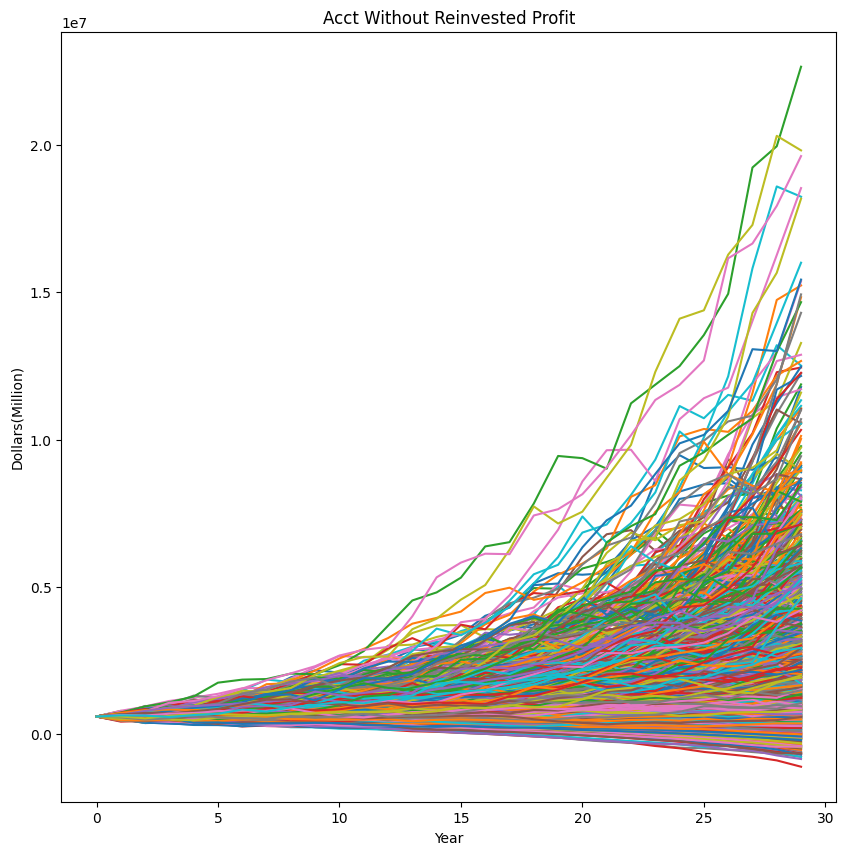

In [172]:
#Plot MonteCarlo

fig = plt.figure(figsize =(10, 10))
plt.title('Acct Without Reinvested Profit')
for i in range(YearlyData.shape[0]):
    label = f'data{i}'   # Generate a label for the series
    plt.plot(YearlyData[i,:,0], YearlyData[i,:,1], label=label)

# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Dollars(Million)')


# Show the plot
plt.show()

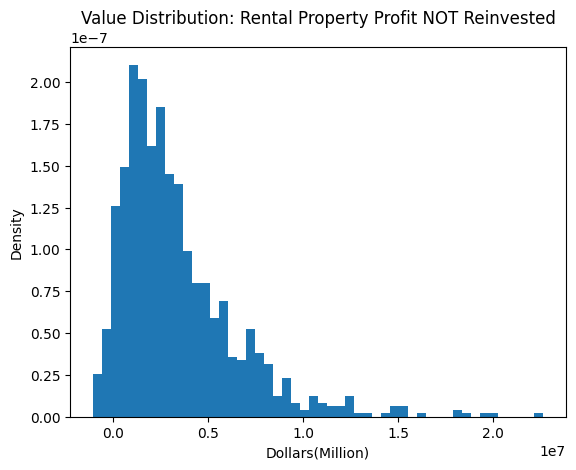

In [183]:
n, bins, patches = plt.hist(YearlyData[:,29,1], bins=50, density = True)
plt.xlabel('Dollars(Million)')
plt.ylabel('Density')
plt.title('Value Distribution: Rental Property Profit NOT Reinvested')

bin_centers = 0.5 * (bins[1:] + bins[:-1])


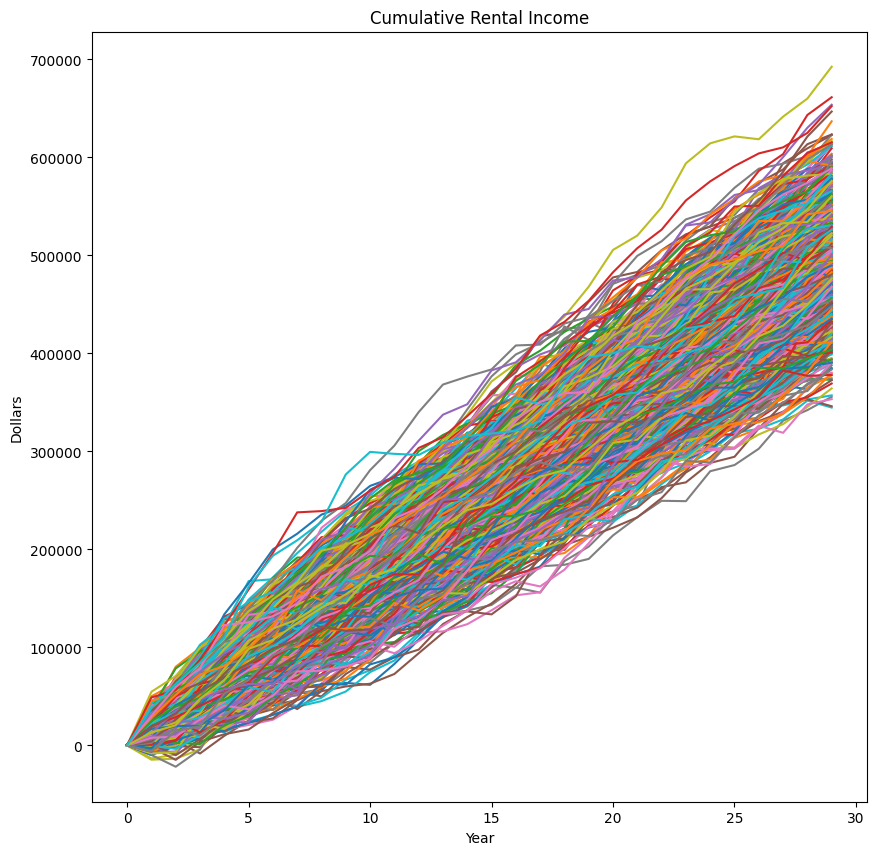

In [174]:
#Plot MonteCarlo for brokerage acct
fig = plt.figure(figsize =(10, 10))
plt.title('Cumulative Rental Income')

for i in range(YearlyData.shape[0]):
    label = f'data{i}'   # Generate a label for the series
    plt.plot(YearlyData[i,:,0], YearlyData[i,:,2], label=label)

# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Dollars')


# Show the plot
plt.show()

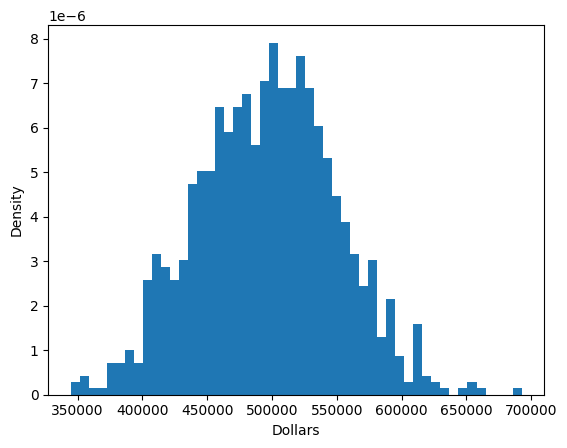

In [175]:
n, bins, patches = plt.hist(YearlyData[:,29,2], bins=50, density = True)
plt.xlabel('Dollars')
plt.ylabel('Density')

bin_centers = 0.5 * (bins[1:] + bins[:-1])


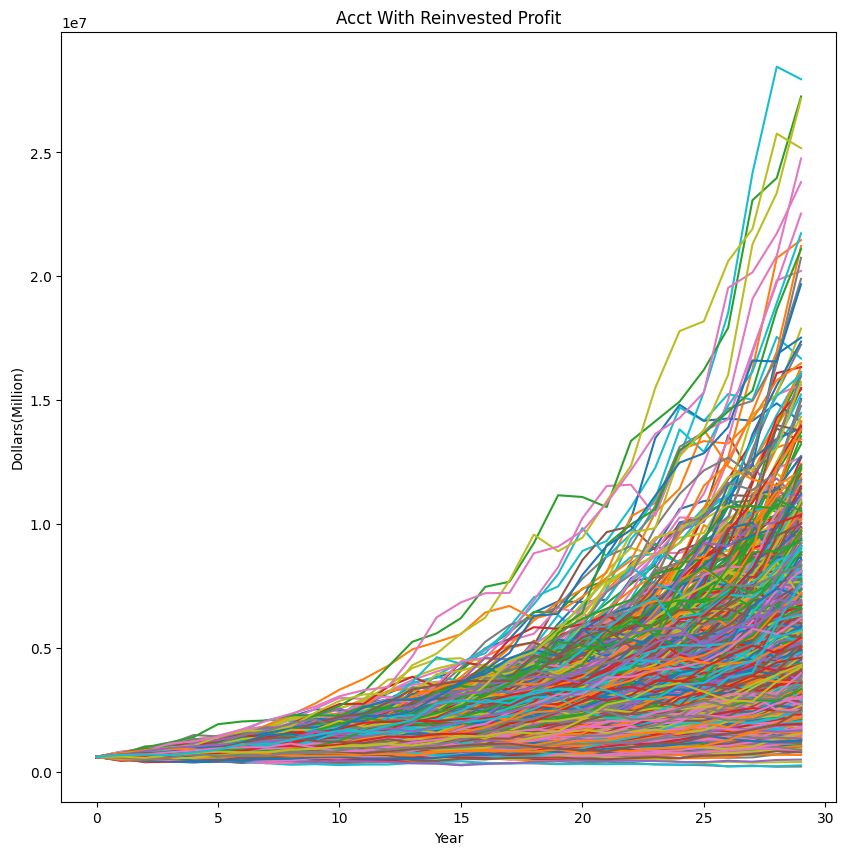

In [176]:
#Plot MonteCarlo

fig = plt.figure(figsize =(10, 10))
plt.title('Acct With Reinvested Profit')
for i in range(YearlyData.shape[0]):
    label = f'data{i}'   # Generate a label for the series
    plt.plot(YearlyData[i,:,0], YearlyData[i,:,3], label=label)

# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Dollars(Million)')


# Show the plot
plt.show()

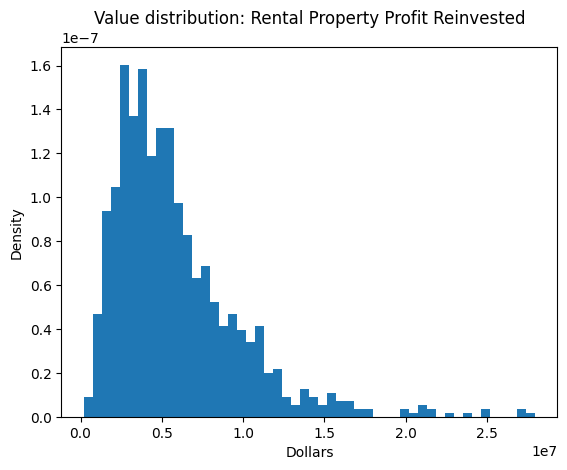

In [181]:
n, bins, patches = plt.hist(YearlyData[:,29,3], bins=50, density = True)
plt.xlabel('Dollars')
plt.ylabel('Density')
plt.title('Value Distribution: Rental Property Profit Reinvested')
bin_centers = 0.5 * (bins[1:] + bins[:-1])


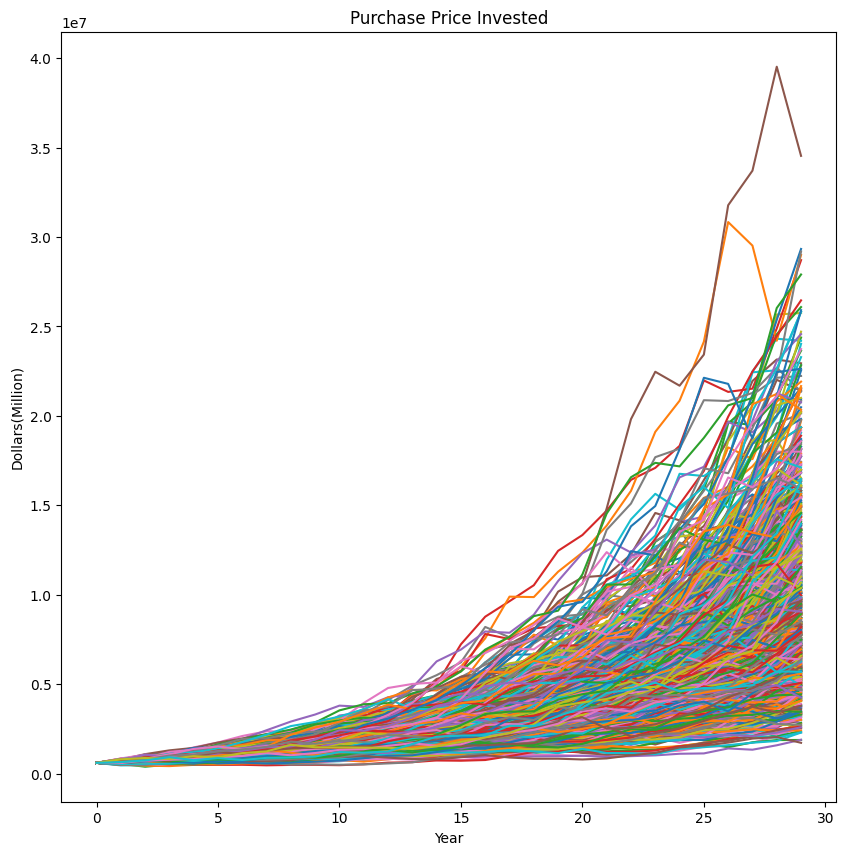

In [163]:
#Plot MonteCarlo

fig = plt.figure(figsize =(10, 10))
plt.title('Purchase Price Invested')
for i in range(YearlyData.shape[0]):
    label = f'data{i}'   # Generate a label for the series
    plt.plot(YearlyData[i,:,0], YearlyData[i,:,4], label=label)

# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Dollars(Million)')


# Show the plot
plt.show()

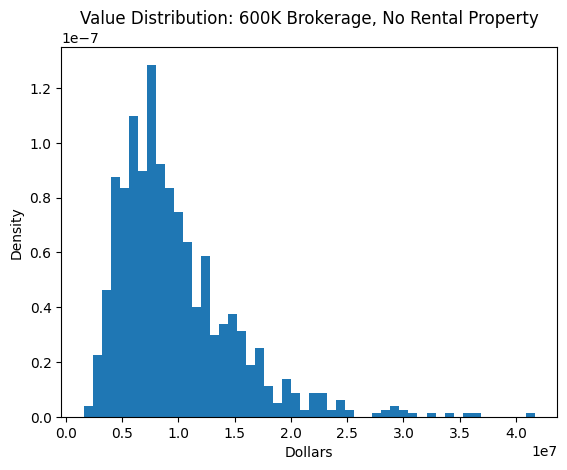

In [182]:
n, bins, patches = plt.hist(YearlyData[:,29,4], bins=50, density = True)
plt.xlabel('Dollars')
plt.ylabel('Density')
plt.title('Value Distribution: 600K Brokerage, No Rental Property')

bin_centers = 0.5 * (bins[1:] + bins[:-1])


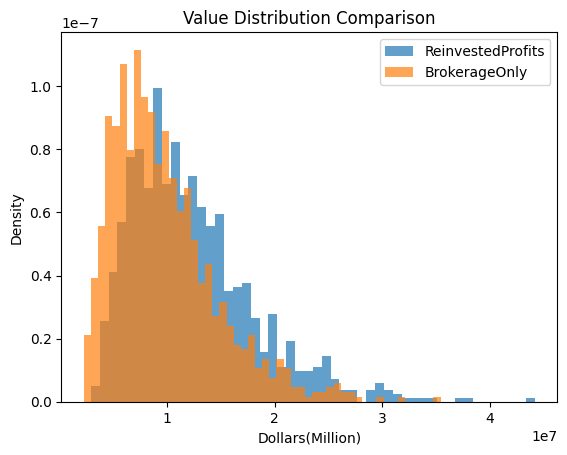

In [203]:
#Plot overlapping
plt.hist(YearlyData[:,29,3], bins=50, density = True, alpha = .7, label = 'ReinvestedProfits')
plt.hist(YearlyData[:,29,4], bins=50, density = True, alpha = .7, label = 'BrokerageOnly')
plt.xlabel('Dollars(Million)')
plt.ylabel('Density')
plt.title('Value Distribution Comparison')
plt.legend()